Saving IRIS.csv to IRIS.csv
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
(150, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.0

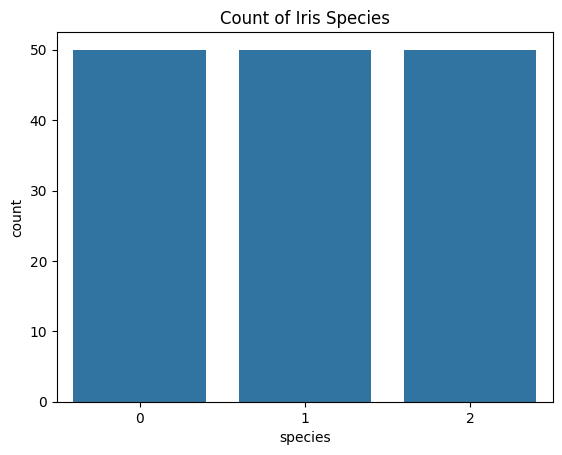

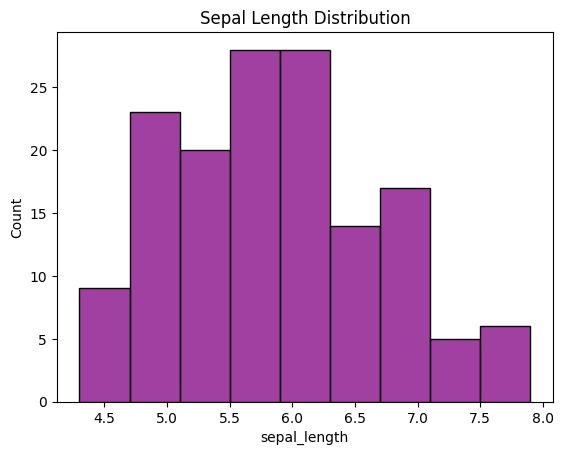

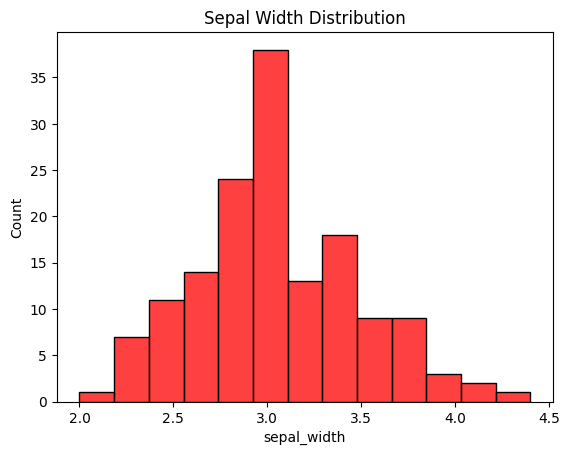

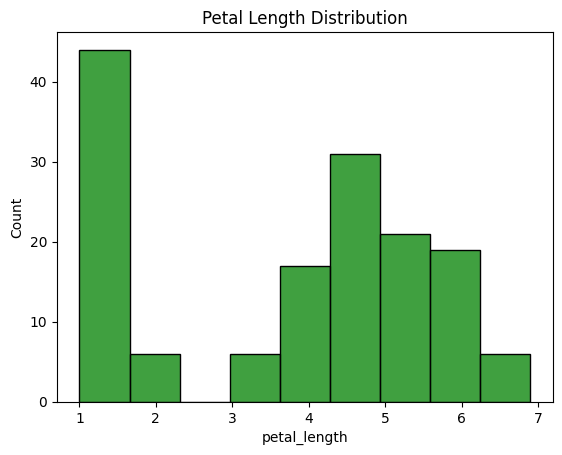

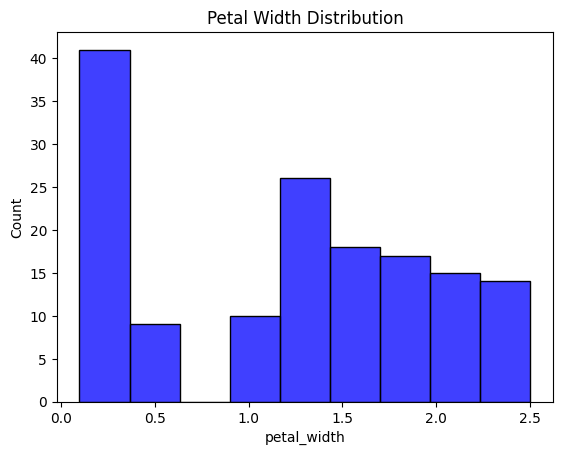

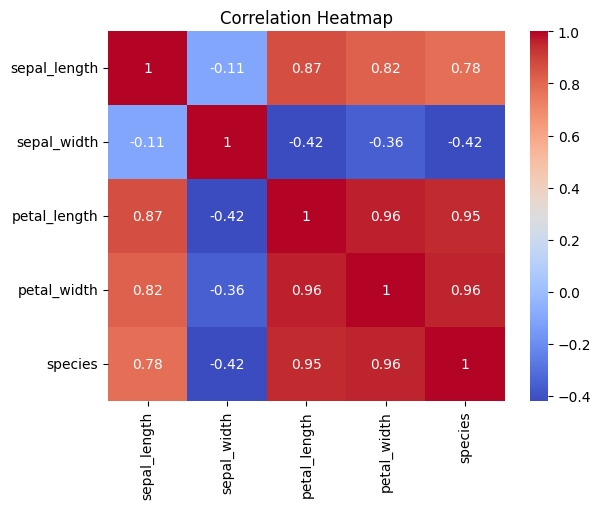

Logistic Regression Train Accuracy: 0.9619047619047619
Logistic Regression Test Accuracy: 1.0
Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 1.0
KNN Train Accuracy: 0.9523809523809523
KNN Test Accuracy: 1.0
Predicted Iris Species: Iris-setosa


In [4]:
# ==============================
# IRIS FLOWER CLASSIFICATION (FULLY CORRECTED CODE)
# ==============================

# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io

from google.colab import files

# ==============================
# Upload & Load Dataset (FIXED)
# ==============================
uploaded = files.upload()

# Automatically get the uploaded filename (prevents NameError)
file_name = list(uploaded.keys())[0]

# Read the CSV correctly
iris = pd.read_csv(io.BytesIO(uploaded[file_name]))

# ==============================
# Dataset Overview
# ==============================
print(iris.head())
print(iris.shape)
print(iris.info())
print(iris.describe())

# ==============================
# Data Preprocessing
# ==============================

# Check missing values
print(iris.isnull().sum())

# Encode species column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
iris['species'] = le.fit_transform(iris['species'])

# ==============================
# Data Visualization
# ==============================

sns.countplot(x='species', data=iris)
plt.title("Count of Iris Species")
plt.show()

sns.histplot(iris['sepal_length'], color='purple')
plt.title("Sepal Length Distribution")
plt.show()

sns.histplot(iris['sepal_width'], color='red')
plt.title("Sepal Width Distribution")
plt.show()

sns.histplot(iris['petal_length'], color='green')
plt.title("Petal Length Distribution")
plt.show()

sns.histplot(iris['petal_width'], color='blue')
plt.title("Petal Width Distribution")
plt.show()

sns.heatmap(iris.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# ==============================
# Feature & Target Selection
# ==============================
X = iris.drop('species', axis=1)
y = iris['species']

# ==============================
# Train-Test Split
# ==============================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# ==============================
# Logistic Regression Model
# ==============================
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=200)
model_lr.fit(X_train, y_train)

print("Logistic Regression Train Accuracy:", model_lr.score(X_train, y_train))
print("Logistic Regression Test Accuracy:", model_lr.score(X_test, y_test))

# ==============================
# Random Forest Classifier
# ==============================
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=300, random_state=42)
model_rf.fit(X_train, y_train)

print("Random Forest Train Accuracy:", model_rf.score(X_train, y_train))
print("Random Forest Test Accuracy:", model_rf.score(X_test, y_test))

# ==============================
# K-Nearest Neighbors
# ==============================
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

print("KNN Train Accuracy:", model_knn.score(X_train, y_train))
print("KNN Test Accuracy:", model_knn.score(X_test, y_test))

# ==============================
# Model Testing with New Data
# ==============================
sample_data = pd.DataFrame({
    'sepal_length': [5.2],
    'sepal_width': [3.6],
    'petal_length': [1.4],
    'petal_width': [0.2]
})

prediction = model_lr.predict(sample_data)
predicted_species = le.inverse_transform(prediction)

print("Predicted Iris Species:", predicted_species[0])
